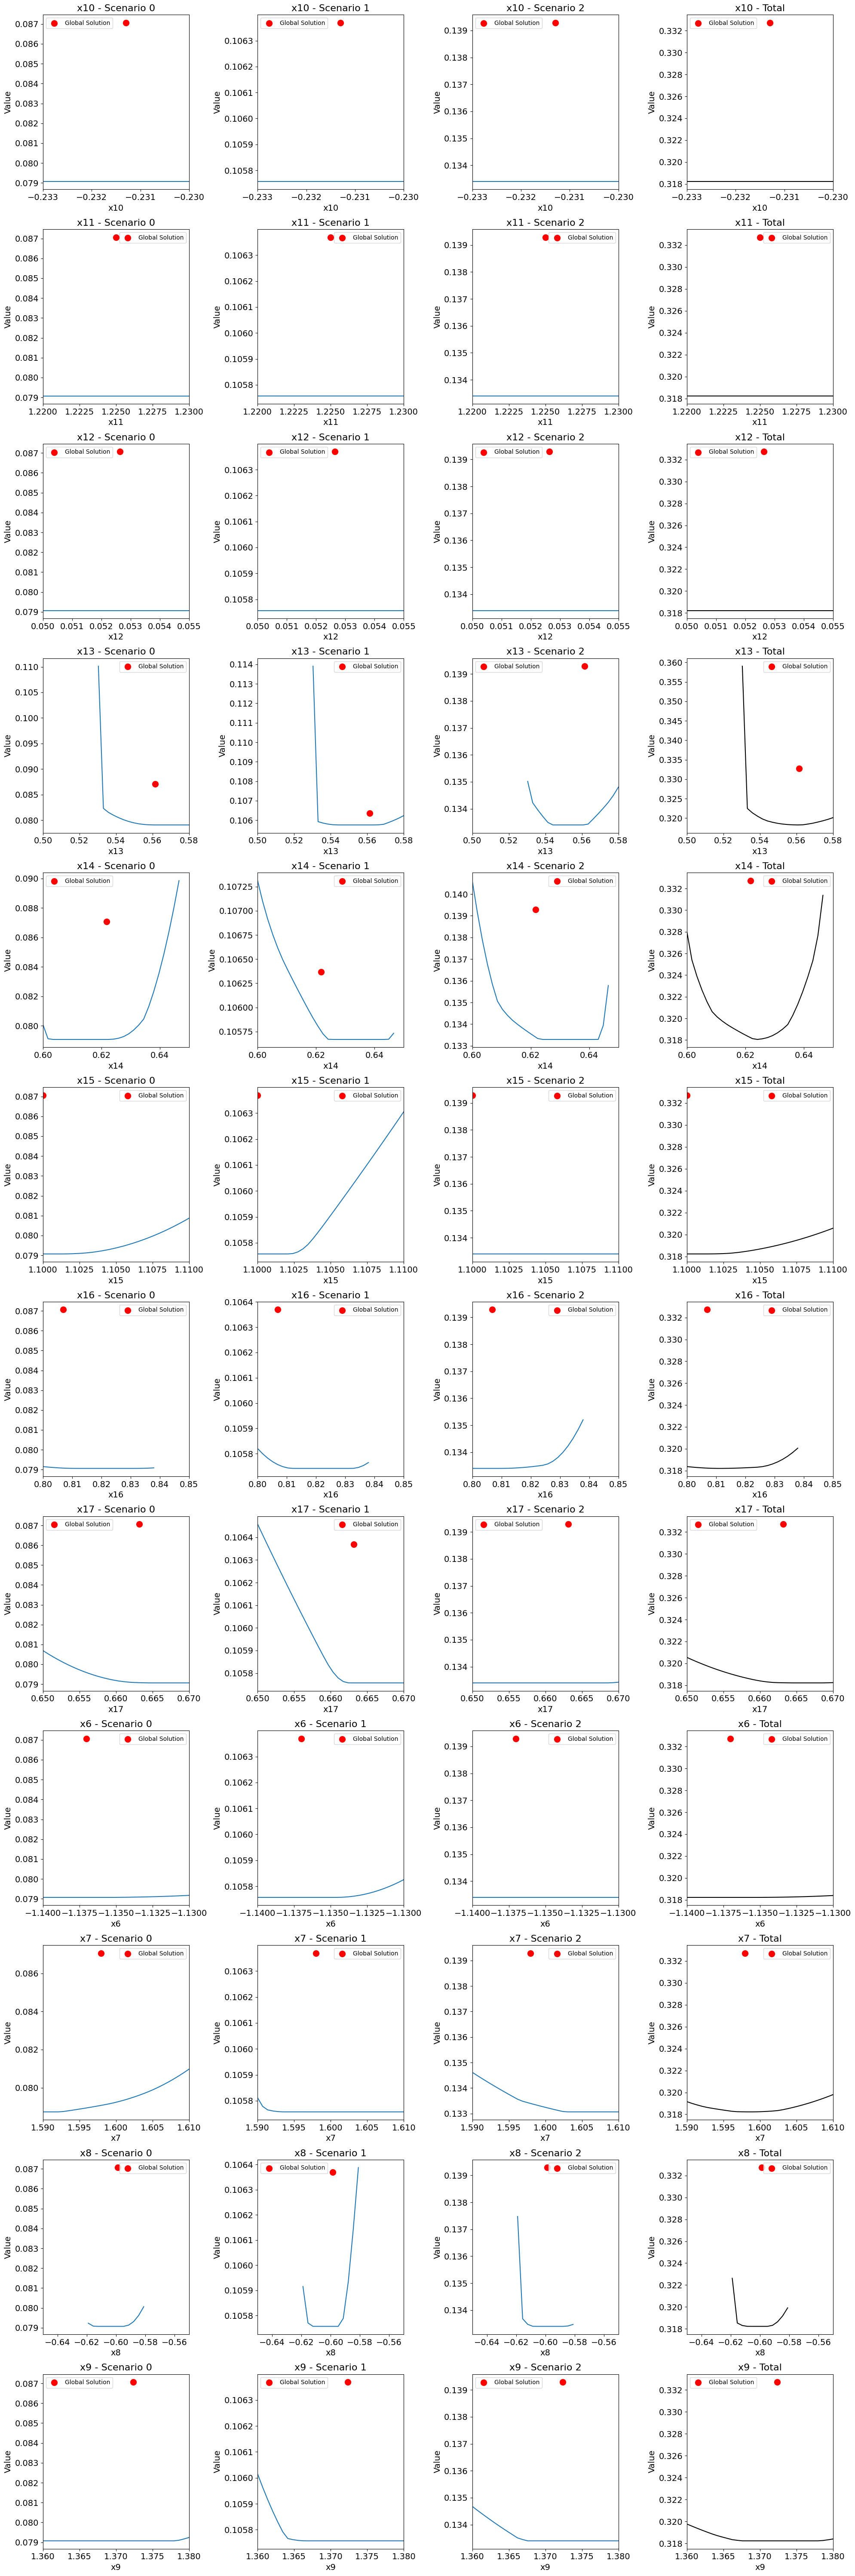

({'x10': {0: array([0.07907256, 0.07907256, 0.07907256, 0.07907256, 0.07907256,
          0.07907256, 0.07907256, 0.07907256, 0.07907256, 0.07907256,
          0.07907256, 0.07907256, 0.07907256, 0.07907256, 0.07907256,
          0.07907256, 0.07907256, 0.07907256, 0.07907256, 0.07907256,
          0.07907256, 0.07907256, 0.07907256, 0.07907256, 0.07907256,
          0.07907256, 0.07907256, 0.07907256, 0.07907256, 0.07907256]),
   1: array([0.10575698, 0.10575698, 0.10575698, 0.10575698, 0.10575698,
          0.10575698, 0.10575698, 0.10575698, 0.10575698, 0.10575698,
          0.10575698, 0.10575698, 0.10575698, 0.10575698, 0.10575698,
          0.10575698, 0.10575698, 0.10575698, 0.10575698, 0.10575698,
          0.10575698, 0.10575698, 0.10575698, 0.10575698, 0.10575698,
          0.10575698, 0.10575698, 0.10575698, 0.10575698, 0.10575698]),
   2: array([0.13339864, 0.13339864, 0.13339864, 0.13339864, 0.13339864,
          0.13339864, 0.13339864, 0.13339864, 0.13339864, 0.13339864,


In [ ]:

from src.models.cz_model import CaoZavalaModel, CaoZavalaAlgo
from NSPLIB.src.instances.ex8_4_4.ex8_4_4_SP import const_model
from graphing.value_function.plotting import plotting
# Constants
ex844_obj= 0.33272388311799445
ex844_sol = {
    'x10': -0.23129676903369037, 'x11': 1.2249985914391361, 'x12': 0.05263738880099749, 'x13': 0.5614202118628403,
    'x14': 0.6217131656002401, 'x15': 1.1, 'x16': 0.806868640168786, 'x17': 0.663161467338442, 'x6': -1.1370129865018144,
    'x7': 1.5979758364259327, 'x8': -0.5986905053355759, 'x9': 1.372365581205024
}
ex844_y_bound = {
    'x10': [-1.2, 0.8], 'x11': [0.1, 2.1], 'x12': [-1.1, 0.9], 'x13': [0, 1],
    'x14': [0, 1], 'x15': [1.1, 1.3], 'x16': [0, 1], 'x17': [0, 1],
    'x6': [-2, 0], 'x7': [0.5, 2.5], 'x8': [-1.5, 0.5], 'x9': [0.2, 2.2]
}
ex844_y_bound = {
    'x10': [-0.233, -0.23], 'x11': [1.22, 1.23], 'x12': [0.05, 0.055], 'x13': [0.5, 0.58],
    'x14': [0.6, 0.65], 'x15': [1.1, 1.11], 'x16': [0.8, 0.85], 'x17': [0.65, 0.67],
    'x6': [-1.14, -1.13], 'x7': [1.59, 1.61], 'x8': [-0.61, -0.57], 'x9': [1.37, 1.38]
}
# Build model
sto_m = const_model()
m = CaoZavalaModel.from_sto_m(sto_m)
m.build()
y_dimension = {
    'x10': {}, 'x11': {}, 'x12': {}, 'x13': {},
    'x14': {}, 'x15': {}, 'x16': {}, 'x17': {},
    'x6': {}, 'x7': {}, 'x8': {}, 'x9': {}
}
plotting(m, 30, y_dimension, ex844_sol, ex844_y_bound,ex844_obj)